# Philosophy Text Classification

Philosophy may seem like an esoteric discipline, but at it's core a philosophy is an attempt to rationally organize one's worldview. That being the case, if we can identify the features of a school of thought, we can identify a worldview. In this project we use NLP to explore the features of 8 schools of thought from the history of Western philosophy, with the primary goal of classification.

We chose to work with 8 schools of thought, representing nearly 2000 years of the history of western philosophy.

- Plato
- Aristotle
- the Rationalists
- the Empiricists
- the German Idealists
- Analytic Philosophy
- Phenomenology
- Contintental Philosophy

The following cell reads our source texts; some are from Project Gutenberg, while others are sourced independently.


In [9]:
from functions import *


In [10]:
# load the texts

## plato
plato_complete = get_text('.\phil_txts\plato_complete_works.txt')

# aristotle
aristotle_vol1 = get_text('.\phil_txts\\aristotle_complete_works_v1.txt')
aristotle_vol2 = get_text('.\phil_txts\\aristotle_complete_works_v2.txt')

## rationalists
spinoza_ethics = get_guten('http://www.gutenberg.org/cache/epub/3800/pg3800.txt')
spinoza_improve_understanding = get_guten('http://www.gutenberg.org/cache/epub/1016/pg1016.txt')
leibniz_theodicy = get_guten('http://www.gutenberg.org/cache/epub/17147/pg17147.txt')
descartes_discourse_method = get_guten('http://www.gutenberg.org/cache/epub/59/pg59.txt')
descartes_meditations = get_text('.\phil_txts\descartes_meditations.txt')
malebranche_search_truth = get_text('.\phil_txts\malebranche_search_truth.txt')

## empiricists
locke_understanding_1 = get_guten('http://www.gutenberg.org/cache/epub/10615/pg10615.txt')
locke_understanding_2 = get_guten('http://www.gutenberg.org/cache/epub/10616/pg10616.txt')
locke_treatise_gov = get_guten('http://www.gutenberg.org/cache/epub/7370/pg7370.txt')
hume_treatise = get_guten('http://www.gutenberg.org/cache/epub/4705/pg4705.txt')
hume_natural_religion = get_guten('http://www.gutenberg.org/cache/epub/4583/pg4583.txt')
berkeley_treatise = get_guten('http://www.gutenberg.org/cache/epub/4723/pg4723.txt')
berkeley_three_dialogues = get_guten('http://www.gutenberg.org/cache/epub/4724/pg4724.txt')

## german idealism
kant_practical_reason = get_text('.\phil_txts\kant_critique_practical_reason.txt')
kant_judgement = get_text('.\phil_txts\kant_critique_judgement.txt')
kant_pure_reason = get_text('.\phil_txts\kant_pure_reason.txt')
fichte_ethics = get_text('.\phil_txts\\fichte_system_of_ethics.txt')
hegel_logic = get_text('.\phil_txts\hegel_science_of_logic.txt')
hegel_phenomenology = get_text('.\phil_txts\hegel_phenomenology_of_spirit.txt')
hegel_right = get_text('.\phil_txts\hegel_elements_of_right.txt')

## analytic
russell_problems_of_phil = get_guten('http://www.gutenberg.org/cache/epub/5827/pg5827.txt')
russell_analylsis_of_mind = get_guten('http://www.gutenberg.org/cache/epub/2529/pg2529.txt')
moore_studies = get_guten('http://www.gutenberg.org/files/50141/50141-0.txt')
wittgenstein_tractatus = get_text('.\phil_txts\wittgenstein_tractatus.txt')
wittgenstein_investigations = get_text('.\phil_txts\wittgenstien_philosophical_investigations.txt')
lewis_papers1 = get_text('.\phil_txts\lewis_papers_1.txt')
lewis_papers2 = get_text('.\phil_txts\lewis_papers_2.txt')
quine_quintessence = get_text('.\phil_txts\quine_quintessence.txt')
popper_science = get_text('.\phil_txts\popper_logic_of_science.txt')
kripke_troubles = get_text('.\phil_txts\kripke_philosophical_troubles.txt')
kripke_naming = get_text('.\phil_txts\kripke_naming_necessity.txt')

## phenomenology
ponty_perception = get_text('.\phil_txts\merleau-ponty_phenomenology_of_perception.txt')
husserl_idea_of = get_text('.\phil_txts\husserl_idea_of_phenomenology.txt')
husserl_crisis = get_text('.\phil_txts\husserl_crisis_of_euro_sciences.txt')
husserl_cartesian = get_text('.\phil_txts\husserl_cartesian_meditations.txt')
heidegger_being_time = get_text('.\phil_txts\heidegger_being_and_time.txt')
heidegger_track = get_text('.\phil_txts\heidegger_off_the_beaten_track.txt')

## continental
foucault_order = get_text('.\phil_txts\\foucault_order_of_things.txt')
foucault_madness = get_text('.\phil_txts\\foucault_history_of_madness.txt')
foucault_clinic = get_text('.\phil_txts\\foucault_birth_of_clinic.txt')
derrida_writing = get_text('.\phil_txts\derrida_writing_difference.txt')
deleuze_oedipus = get_text('.\phil_txts\deleuze_guattari_anti-oedipus.txt')
deleuze_difference = get_text('.\phil_txts\deleuze_difference_repetition.txt')

Unfortunately, most of these texts include front and end-matter. There isn't a clear and consistent way that these are differentiated, so we go through them one by one to clip the ends and get the actual philosophical discussion. Some texts include footnotes from translators or editors as well, but removing those would be more time consuming than we can really do here. So we leave those footnotes as a kind of noise in our data, and hope to remove them in a future iteration.

In [11]:
plato_complete = plato_complete.split('find that an enticing')[1][388:].split('Demeter, whose cult at')[0]
aristotle_vol_1 = aristotle_vol1.split('1a20-1b9')[1].split('799a16')[0]
aristotle_vol_2 = aristotle_vol2.split('830a5-830b4')[1].split('1462a5-1462a13')[0]
spinoza_ethics = spinoza_ethics.split('ranslated from the Latin by R.')[1][71:].split('End of the Ethics')[0]
spinoza_improve_understanding = spinoza_improve_understanding.split('Farewell.*')[1][20:].split('End of ')[0]
leibniz_theodicy = leibniz_theodicy.split('appeared in 1710 as the')[1][202:].split('SUMMARY OF THE CON')[0][:-140]
descartes_discourse_method = descartes_discourse_method.split('PREFATORY NOTE')[1][18:].split('End of the Pr')[0]
descartes_meditations = descartes_meditations.split('LETTER')[1][1:].split('EXPLANATORY NOTES')[0][:-8]
locke_understanding_1 = locke_understanding_1.split('2 Dorset Court, 24th of May, 1689')[1][50:].split('End of the Pro')[0][:-30]
locke_understanding_2 = locke_understanding_2.split('1. Man fitted to form articulated Sounds.')[1][4:].split('End of the Pro')[0][:-25]
malebranche_search_truth = malebranche_search_truth.split("n's Mind and the Use H")[1][64:].split('Beati qui')[0]
locke_treatise_gov = locke_treatise_gov.split('now lodged in Christ College, Cambridge.')[1][21:].split('FINIS.')[0]
hume_treatise = hume_treatise.split('ADVERTISEMENT')[1][9:].split('End of Pro')[0][:-14]
hume_natural_religion = hume_natural_religion.split('PAMPHILUS TO HERMIPPUS')[1][6:].split('End of the Pro')[0][:-22]
berkeley_treatise = berkeley_treatise.split('are too apt to condemn an opinion before they rightly')[1][47:].split('End of the Pr')[0][:-22]
berkeley_three_dialogues = berkeley_three_dialogues.split('THE FIRST DIALOGUE')[1][17:].split('End of the Pro')[0][:-22]
kant_practical_reason = kant_practical_reason.split('erner Pluhar an')[1][329:].split('stone of the wi')[0][:-20]
kant_judgement = kant_judgement.split('TO THE FIRST EDITION,* 1790')[1][1:].split('EXPLANATORY NOTES')[0][:-39]
kant_pure_reason = kant_pure_reason.split('Bacon of Verulam')[1][33:].split('(Persius, Satires, iii, 78-9).')[0][:-1]
fichte_ethics = fichte_ethics.split('(“Krause Nachschrift,” 1798/99)')[1][111:].split('Page 345')[0][:-2]
hegel_logic = hegel_logic.split('complete transformati')[1][249:].split('Hegel’s Logic in its revised and unrevised parts')[0][:-32]
hegel_phenomenology = hegel_phenomenology.split('PREFACE: ON SCIENTIFIC')[1][1:].split('1I Adaptation')[0][:-62]
hegel_right = hegel_right.split('he immediate occasion f')[1][184:].split('I Hegel lectured on the topics in')[0][:-28]
russell_problems_of_phil = russell_problems_of_phil.split('n the following pages')[1].split('BIBLIOGRAPHICAL NOTE')[0]
russell_analylsis_of_mind = russell_analylsis_of_mind.split('H. D. Lewis')[2][21:].split('End of Pro')[0]
moore_studies = moore_studies.split('Aristotelian Society,_ 1919-20.')[1][23:].split('E Wes')[0][:-10]
wittgenstein_tractatus = wittgenstein_tractatus.split('TRACTATUS LOGICO-PHILOSOPHICUS')[1][70:].split('I NDEX')[0][:-8]
wittgenstein_investigations = wittgenstein_investigations.split('catty')[1][787:].split("above', 351")[0]
lewis_papers1 = lewis_papers1.split('The fifteen papers')[1][61:].split('Acquai')[0][:-10]
lewis_papers2 = lewis_papers2.split('Part Four Counterfactuals and Time')[1][17:].split('end p.342')[0]
quine_quintessence = quine_quintessence.split('T R UT H B Y C O N V E N T I O N')[1].split('CREDITS')[0][:-7]
popper_science = popper_science.split('F IRST E NGLISH E DITION, 1959')[1][2:].split('This is the end of the text of the original book.')[0]
kripke_troubles = kripke_troubles.split('apters 2, 3, 7, 10, 11, and 13 are previously unpublish')[1][103:].split('ans, Gareth. 198')[0][:-25]
kripke_naming = kripke_naming.split('xjvdsa')[1][10:].split('hese addenda represe')[0][:-35]
ponty_perception = ponty_perception.split('P REFACE')[1].split('B IBLIOGRAPHY')[0][:-65]
husserl_idea_of = husserl_idea_of.split('LECTUREl')[1][9:].split('Abstraction, ideating, 47, 50, 65')[0][:-10]
husserl_crisis = husserl_crisis.split('§ 1.')[1].split('Appendix X:')[0]
husserl_cartesian = husserl_cartesian.split('of philosophical reflection.')[1].split('n. 72.')[0][:-5]
heidegger_being_time = heidegger_being_time.split("AUTHOR'S PREFACE TO THE")[1][25:].split('Not "the" sole way.')[0][:-8]
heidegger_track = heidegger_track.split('translated in several ')[1][15:].split('et-up [dar Gestellj as the uunost obli')[0][:-32]
foucault_order = foucault_order.split('P REFACE')[1]
foucault_madness = foucault_madness.split('ickering simulacra, an')[1][112:].split('Page 591')[0]
foucault_clinic = foucault_clinic.split('iagnostic (Paris, 1962, p.')[1][15:].split('de Sade.')[0][:-33]
derrida_writing = derrida_writing.split('(Flaubert, Preface d la d')[1][10:].split('Reb Derissa')[0]
deleuze_oedipus = deleuze_oedipus.split('xjdsde')[1].split('jajielaks')[0]
deleuze_difference = deleuze_difference.split('Introduction:')[1].split('Plateaus')[0][:-65]

Having isolated the relevant portions of each document, we can now unify all the texts in each school.

In [12]:
# a list of books for each school, then aggregated and entered into a dictionary
plato_texts = [plato_complete]
aristotle_texts = [aristotle_vol1, aristotle_vol2]
rationalist_texts = [spinoza_ethics, spinoza_improve_understanding, leibniz_theodicy, descartes_discourse_method, descartes_meditations, malebranche_search_truth]
empiricist_texts = [locke_treatise_gov, locke_understanding_1, locke_understanding_2, hume_treatise, hume_natural_religion, berkeley_three_dialogues, berkeley_treatise]
german_idealist_texts = [kant_practical_reason, kant_judgement, kant_pure_reason, fichte_ethics, hegel_logic, hegel_phenomenology, hegel_right]
analytic_texts = [russell_analylsis_of_mind, russell_problems_of_phil, moore_studies, wittgenstein_investigations, wittgenstein_tractatus, lewis_papers1, lewis_papers2, quine_quintessence, popper_science, kripke_naming, kripke_troubles]
phenomenology_texts = [ponty_perception, husserl_cartesian, husserl_crisis, husserl_idea_of, heidegger_being_time, heidegger_track]
continental_texts = [foucault_clinic, foucault_madness, foucault_order, derrida_writing, deleuze_difference, deleuze_oedipus]

all_texts = plato_texts + aristotle_texts + empiricist_texts + rationalist_texts + analytic_texts + continental_texts + phenomenology_texts + german_idealist_texts
    
text_dict = {'plato': plato_texts, 'aristotle': aristotle_texts, 'empiricism': empiricist_texts, 'rationalism': rationalist_texts, 
            'german_idealism': german_idealist_texts, 'phenomenology': phenomenology_texts, 'analytic': analytic_texts, 
            'continental': continental_texts}
    
for school in text_dict.keys():
    text_dict[school] = ' . '.join(text_dict[school])

For a bit of preliminary EDA, we can make word clouds for each school. Here we prepare the text for this with some very basic cleaning to remove encoding artifacts and the like. Then we build the word clouds and present them.

In [13]:
for school in text_dict.keys():
    text_dict[school] = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', text_dict[school])
    text_dict[school] = re.sub(r'[0123456789]', ' ', text_dict[school])
    

In [14]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 'might', "'s", 'b', 'ofthe', 'p.', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 'hyl', 'phil'] + stopwords_list


In [15]:
cloud_dict = {}
for school in text_dict.keys():
    cloud_dict[school] = make_word_cloud(text_dict[school], custom_stopwords)
    cloud_dict['middle'] = make_word_cloud('this page intentionally left blank', stopwords=[])

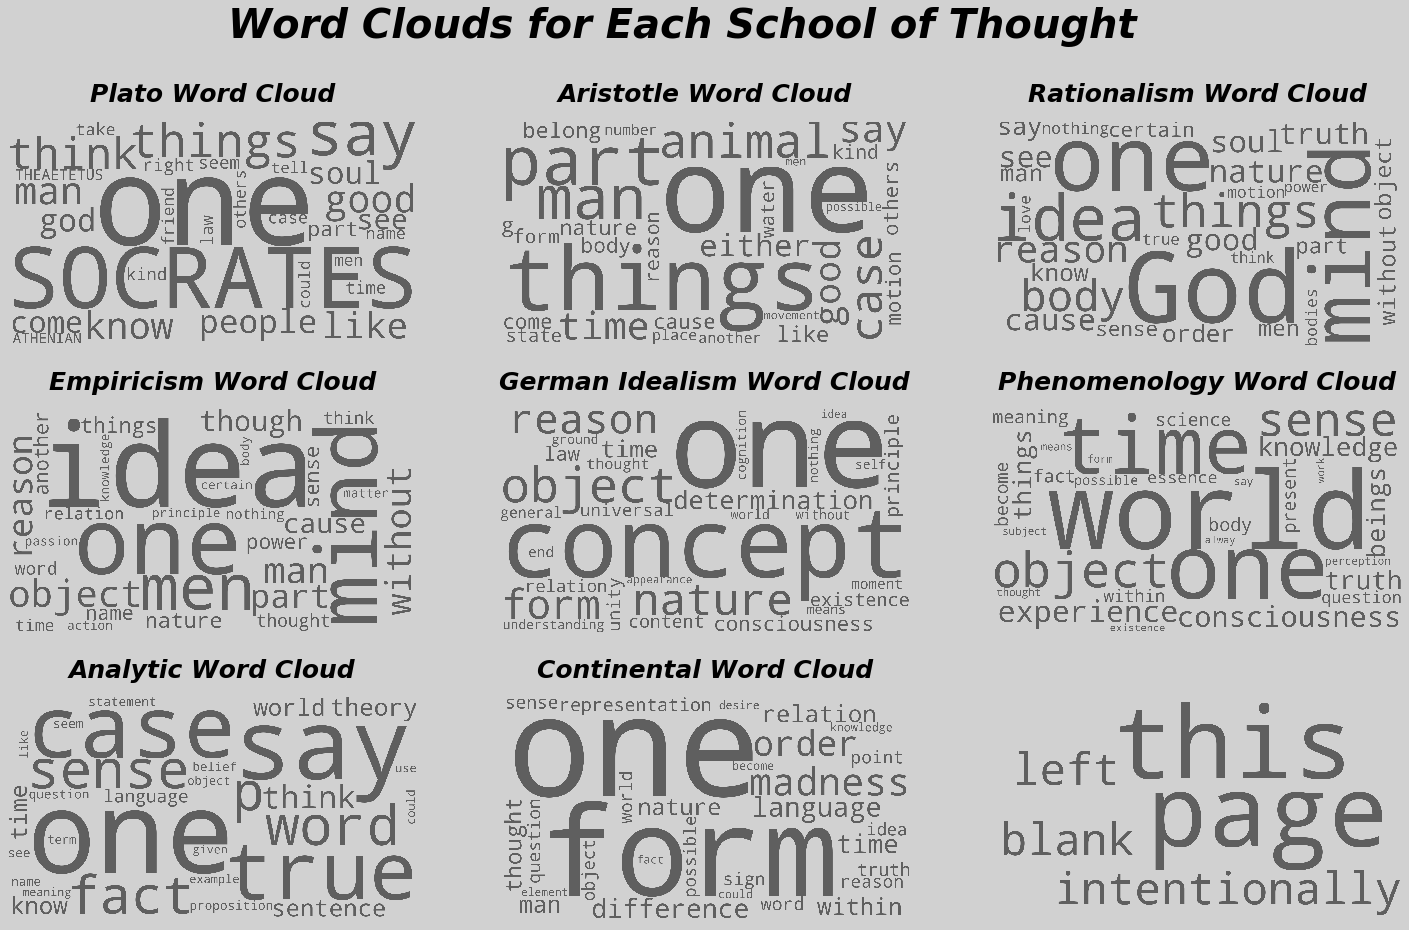

In [16]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(25, 15))
fig.tight_layout(rect=[2, 2, 1, 3])
fig.suptitle('Word Clouds for Each School of Thought', size=40, fontweight='bold')
ax1.imshow(cloud_dict['plato'])
ax1.set_title('Plato Word Cloud', size=25, pad=20, fontweight='bold')
ax2.imshow(cloud_dict['aristotle'])
ax2.set_title('Aristotle Word Cloud', size=25, pad=20, fontweight='bold')
ax3.imshow(cloud_dict['rationalism'])
ax3.set_title('Rationalism Word Cloud', size=25, pad=20, fontweight='bold')
ax4.imshow(cloud_dict['empiricism'])
ax4.set_title('Empiricism Word Cloud', size=25, pad=20, fontweight='bold')
ax5.imshow(cloud_dict['german_idealism'])
ax5.set_title('German Idealism Word Cloud', size=25, pad=20, fontweight='bold')
ax6.imshow(cloud_dict['phenomenology'])
ax6.set_title('Phenomenology Word Cloud', size=25, pad=20, fontweight='bold')
ax7.imshow(cloud_dict['analytic'])
ax7.set_title('Analytic Word Cloud', size=25, pad=20, fontweight='bold')
ax8.imshow(cloud_dict['continental'])
ax8.set_title('Continental Word Cloud', size=25, pad=20, fontweight='bold')
ax9.imshow(cloud_dict['middle'])
for ax in fig.axes:
    ax.axis('off')
fig.patch.set_facecolor('#D1D1D1')
plt.show()

Interestingly, every school of philosophy makes heavy use of the word 'one.' I guess Plato was right. 

Overall, a lot of the same words show up in all the schools. Those words won't be useful in our distinguishing them. But there are also a good number of differences between the schools as well, enough that a model is not *prima facie* a lost cause.

Our next step is to explore the frequency distrubtion of words in the corpus, both in the texts as a whole and in the individual schools.

In [17]:
all_text_string = ' , '.join(all_texts)
all_text_string = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', all_text_string)
all_text_string = re.sub(r'[0123456789]', ' ', all_text_string)

all_text_words = word_tokenize(all_text_string)

In [18]:
cleaned_words = [x.lower() for x in all_text_words if x.lower() not in custom_stopwords]
freq_dist = FreqDist(cleaned_words)

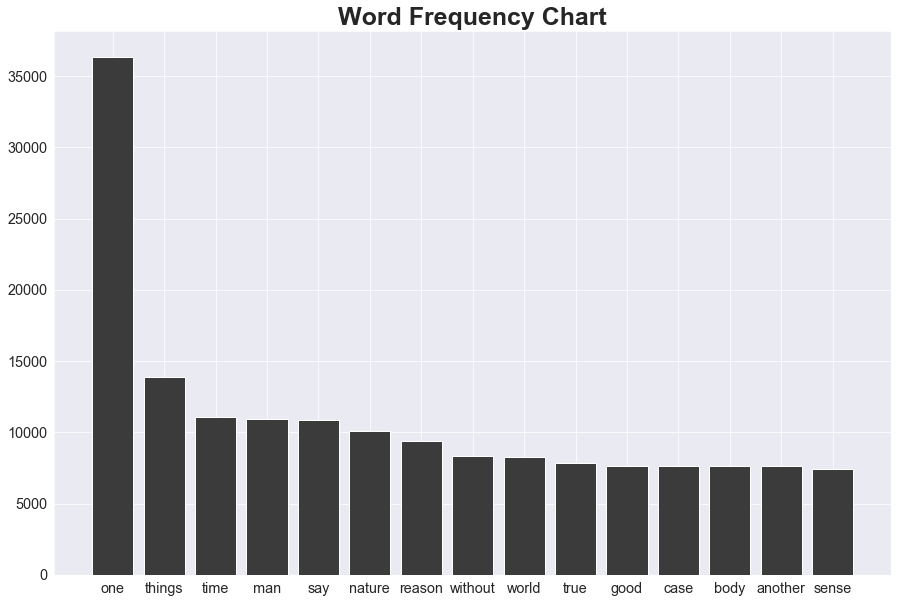

In [19]:
sns.set_style('darkgrid')
fig = plt.subplots(figsize=(15, 10))
plt.bar(x=[x[0] for x in freq_dist.most_common(15)], height=[x[1] for x in freq_dist.most_common(15)], color='#3B3B3B')
plt.title('Word Frequency Chart', size=25, fontweight='bold')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
plt.show()

This more or less confirms what we found with the word clouds, though the word 'one' having such an enormous lead over the rest is a bit surprising. 

Next, we make charts for the top words of each school. To get more unique words, we will remove the top 50 most common words from the running.

In [20]:
uninformative_words = ['else', 'shall', 'either', 'still', 'rather', 'another', 'made', 'without']
school_stopwords = custom_stopwords + [x[0] for x in freq_dist.most_common(50)] + uninformative_words

In [21]:
freq_dist_dict = {}
for school in text_dict.keys():
    school_words = word_tokenize(text_dict[school])
    cleaned_words_school = [x.lower() for x in school_words if x.lower() not in school_stopwords]
    school_freq_dict = FreqDist(cleaned_words_school)
    freq_dist_dict[school] = school_freq_dict.most_common(15)

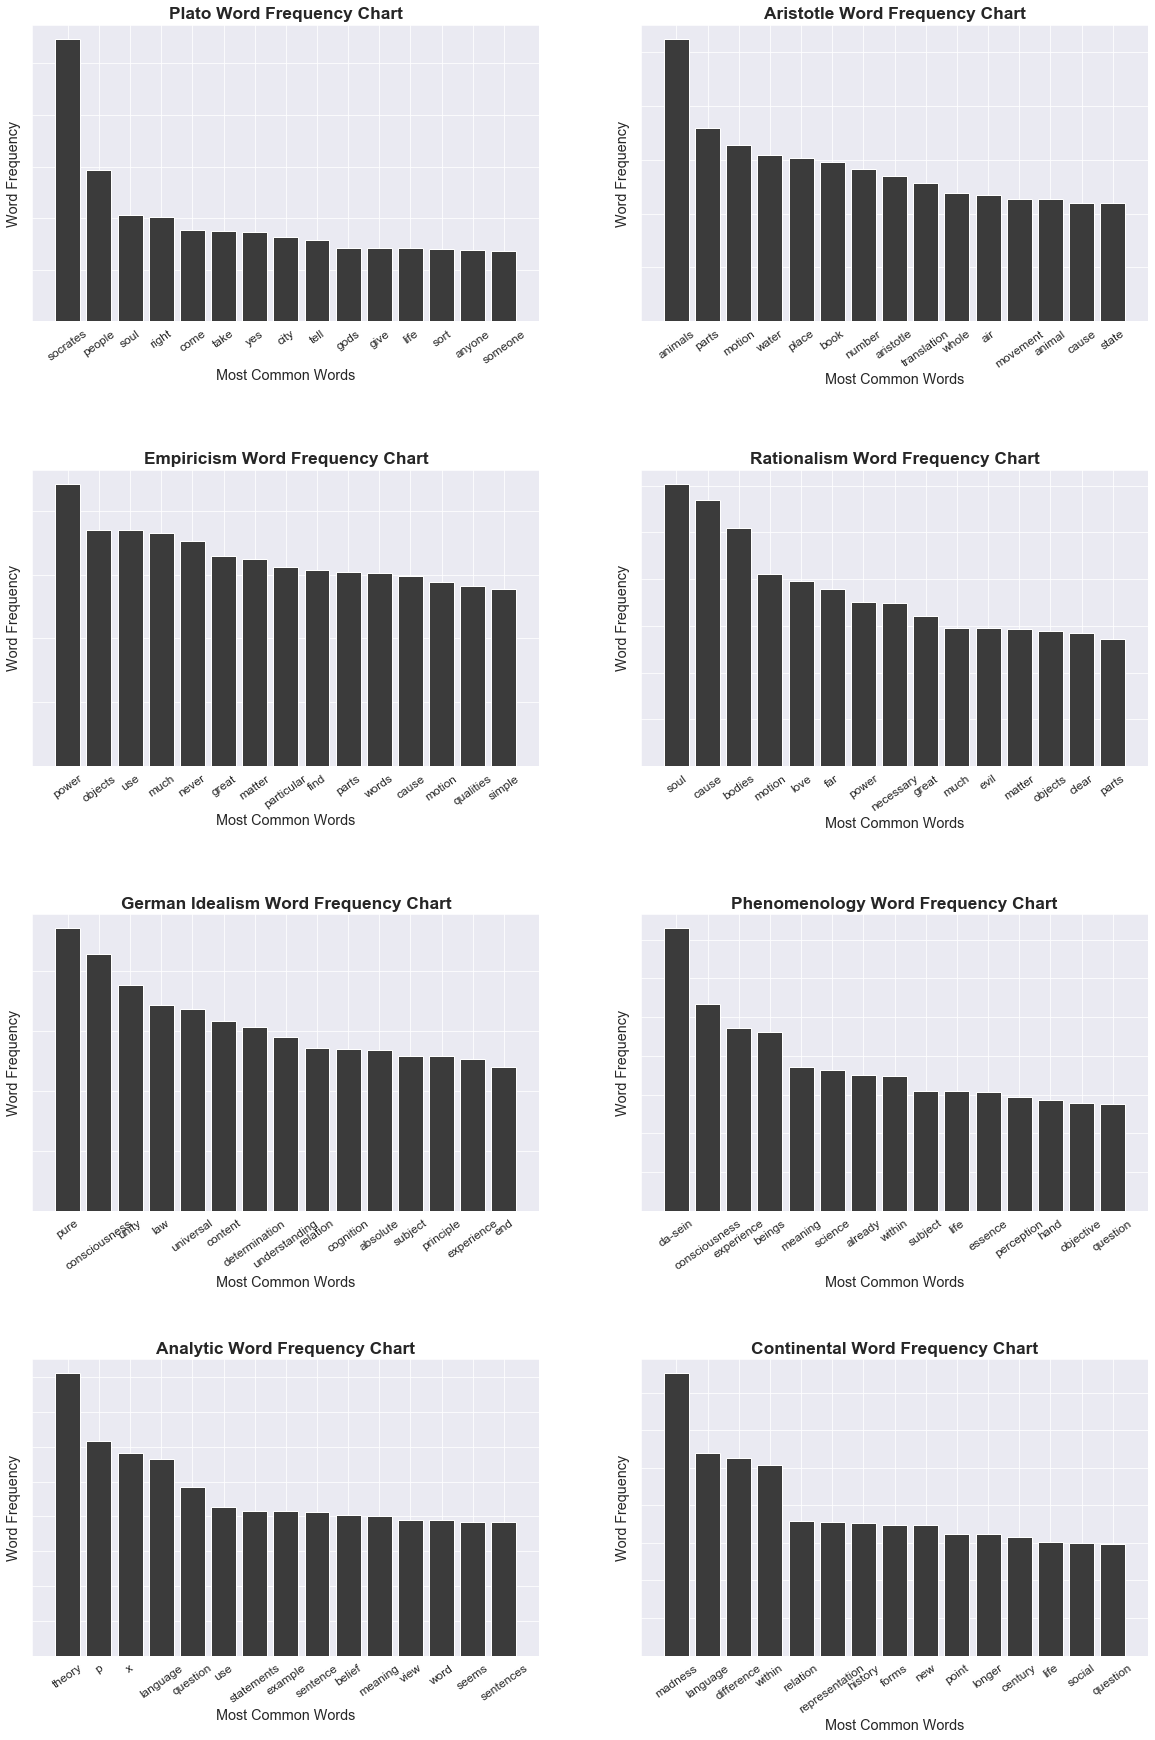

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(freq_dist_dict.keys(), axs.flatten()):
    ax.bar(x=[x[0] for x in freq_dist_dict[school]], height=[x[1] for x in freq_dist_dict[school]], color='#3B3B3B')
    xlabels = [x[0] for x in freq_dist_dict[school]]
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Words', size='x-large')
    ax.set_ylabel('Word Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Word Frequency Chart', size='xx-large', fontweight='bold')
plt.show()

A lot of this is unsurprising - no one should be baffled that the word 'socrates' turns up a lot in Plato. Others are perhaps more interesting - the appearance of 'animal' in Aristotle, for example. And yet others are just artifacts of the texts we had available - the word 'madness' is common in Continental philosophy because of Foucault's book *History of Madness*. That said, some of these are comical as well. For example, analytic philosophy's tendency to logical formalism led to it having variables for propositions ('p' and 'x') among its most commonly used words.

Still, these each seem substantially different enough that we should be able to build a reasonable model. In the remainder of this notebook, we build a few quick text classification models and analyze feature importance.

First we quickly load the text into a dataframe, tokenize it, then build a Multinomial Naive Bayes model. The tokenization function does some basic cleaning tasks as well, such as removing empty or very short sentences and cleaning out headings left over from the transformation of pdfs to txt files. 

In [23]:
tokenized_text_dict = {}
for school in text_dict.keys():
    tokenized_text_dict[school] = tokenize_text(text_dict[school])

In [24]:
text_df = pd.DataFrame(columns=['school', 'sentences'])
for school in tokenized_text_dict.keys():
    school_df = pd.DataFrame(columns=['school', 'sentences'])
    school_df['sentences'] = tokenized_text_dict[school]
    school_df['school'] = school
    text_df = text_df.append(school_df)

text_df.sample(5)

,school,sentences
2869,german_idealism,now for this purpose experience cannot be ma...
19317,phenomenology,this happens in creation understoodas the bri...
30280,analytic,it never happens that old experiments one day ...
10536,phenomenology,but the repudiation of a psychological groundi...
12452,analytic,they are however something closely analogous ...


It's unlikely that all the thinkers are equally represented; even if we chose a good number of texts for each school, they differ in length.

In [25]:
text_df['school'].value_counts(normalize='true')

aristotle          0.195562
analytic           0.182859
german_idealism    0.146764
continental        0.121633
phenomenology      0.106751
plato              0.091913
rationalism        0.086285
empiricism         0.068233
Name: school, dtype: float64

While this spread is not ideal (we'd like each school to be a little above 10% and there are a couple that are quite far from that), it'll do. Our next step is to use sci-kit learn to split the data and build a model, though we quickly package our data for use elsewhere first.

In [26]:
data_pkl = open("data.pkl", "wb") 
pickle.dump(text_df, data_pkl) 
data_pkl.close()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(text_df['sentences'], text_df['school'])

In [28]:
tfidvectorizer = TfidfVectorizer(decode_error='ignore', stop_words=custom_stopwords)
tf_idf_data_train = tfidvectorizer.fit_transform(x_train)
tf_idf_data_test = tfidvectorizer.transform(x_test)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

nb_classifier = MultinomialNB()
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

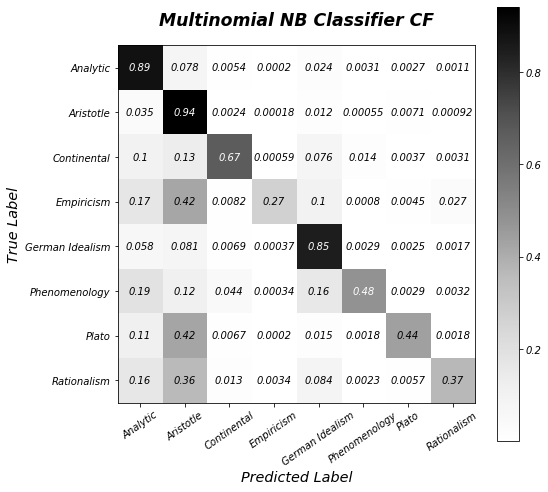

In [30]:
from sklearn.metrics import plot_confusion_matrix
sns.reset_orig()
plot_pretty_cf(nb_classifier, tf_idf_data_test, y_test, title='Multinomial NB Classifier CF')

In [31]:
print(classification_report(y_test, nb_test_preds))

                 precision    recall  f1-score   support

       analytic       0.66      0.89      0.76     10113
      aristotle       0.55      0.94      0.69     10830
    continental       0.90      0.67      0.77      6747
     empiricism       0.97      0.27      0.42      3772
german_idealism       0.72      0.85      0.78      8147
  phenomenology       0.94      0.48      0.64      5900
          plato       0.91      0.44      0.59      5058
    rationalism       0.90      0.37      0.52      4733

       accuracy                           0.69     55300
      macro avg       0.82      0.61      0.65     55300
   weighted avg       0.77      0.69      0.68     55300



These results are not horrible. Given that we had 8 categories, the accuracy of random chance would have been .125, and our score is quite a bit higher than that. So at least we can see that there are enough differences between the texts to do some reasonable identifying.

Some other observations - 
- the recall scores of our different categories seem to be more or less directly correlated to their representation in the data. Aristotle, the most common category, also has the highest recall score. This suggests that if we might want to SMOTE our data to correct for class imbalances.
- As one might expect, thinkers closer in time are more easily conflated. Plato is often miscategorized as Aristotle, for example, and the Empiricists and Rationalists likewise. Meanwhile, Analytic philosophy has no chance of being mistaken for the Philosopher's work. German Idealism is an odd outlier in this context.

Our next steps:
<br>(1) try the NB model again, but this time using SMOTE to equalize the classes
<br>(2) try a random forest model so that we can get a feel for what features are most important.

In [32]:
smote = SMOTE()
xtrain_smote, ytrain_smote = smote.fit_resample(tf_idf_data_train, y_train)

In [33]:
nb_classifier_smote = MultinomialNB()
nb_classifier_smote.fit(xtrain_smote, ytrain_smote)
nb_test_smote_preds = nb_classifier_smote.predict(tf_idf_data_test)

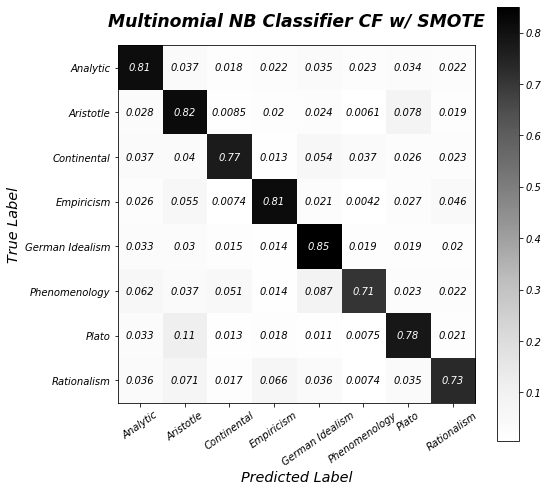

In [34]:
plot_pretty_cf(nb_classifier_smote, tf_idf_data_test, y_test, title='Multinomial NB Classifier CF w/ SMOTE')

In [36]:
print(classification_report(y_test, nb_test_smote_preds))

nb_model_pkl = open("NB_model.pkl", "wb")
pickle.dump(nb_classifier_smote, nb_model_pkl) 
nb_model_pkl.close()

vectorizer_pkl = open('vectorizer.pkl', 'wb')
pickle.dump(tfidvectorizer, vectorizer_pkl)
vectorizer_pkl.close()

                 precision    recall  f1-score   support

       analytic       0.83      0.81      0.82     10113
      aristotle       0.80      0.82      0.81     10830
    continental       0.86      0.77      0.81      6747
     empiricism       0.73      0.81      0.77      3772
german_idealism       0.79      0.85      0.82      8147
  phenomenology       0.84      0.71      0.77      5900
          plato       0.67      0.78      0.73      5058
    rationalism       0.75      0.73      0.74      4733

       accuracy                           0.79     55300
      macro avg       0.78      0.78      0.78     55300
   weighted avg       0.80      0.79      0.79     55300



Correcting the class imbalance seems to have dramatically improved our model performance across the board, with an about 10% increase in accuracy. At this point the classification of sentences by philosophers seems to be reasonably accurate.

Still, let's take a look at what a random forest model can give us and examine the different feature importances.

In [ ]:
# first a very basic random forest with no hyperparameters, though we train it on the smote data
rf_classifier = RandomForestClassifier()

rf_classifier.fit(xtrain_smote, ytrain_smote)

rf_pkl = open('random_forest.pkl', 'wb')
pickle.dump(rf_classifier, rf_pkl)
rf_pkl.close()

In [ ]:
plot_pretty_cf(rf_classifier, tf_idf_data_test, y_test, title='Random Forest CF')

In [ ]:
rf_test_preds = rf_classifier.predict(tf_idf_data_test)
print(classification_report(y_test, rf_test_preds))

Not bad, but definitely worse than the Bayesian model. Let's see if a gridsearch can improve this.

In [ ]:
forest_param_grid = {
    'n_estimators': [150, 200],
    'max_depth': [3, 4, 5],
    'max_features': [0.25, 0.1] 
}

forest_gscv = GridSearchCV(rf_classifier, param_grid=forest_param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

In [ ]:
forest_gscv.fit(xtrain_smote, ytrain_smote)

In [ ]:
best_model = forest_gscv.best_estimator_
best_model.score(tf_idf_data_test, y_test)

In [ ]:
plot_pretty_cf(best_model, tf_idf_data_test, y_test, title='Random Forest CF')

In [ ]:
grid_search_preds = best_model.predict(tf_idf_data_test)
print(classification_report(y_test, grid_search_preds))

The best random forest from this grid search actually performed significantly worse than the Bayesian model, and much worse than even the no-frills random forest. In fact, it did not much better than random chance. GIven the long runtimes of the gridsearch, it wasn't feasible for us to try more in the time we had.

Still, it is a random forest, not a Bayesian model, that can give us feature importances. 

In [ ]:
feature_importances = dict(pd.Series(rf_classifier.feature_importances_, 
                            index=tfidvectorizer.get_feature_names()).sort_values(ascending=False)[:20])

sns.set_style('darkgrid')
fig = plt.subplots(figsize=(15, 10))
sns.barplot(x=list(feature_importances.keys()), y=list(feature_importances.values()), color='#3B3B3B')
plt.title('Feature Importances RF Classifier', size=25, fontweight='bold')
plt.xlabel('Words', size='xx-large')
plt.xticks(rotation=17, size='large')
plt.ylabel('Importance', size='xx-large')
plt.yticks(size='large')
plt.show()

This actually makes a lot of sense. 'God' is a key term for Rationalists, but used less by others. 'Dasein' is a term of art for Heidegger, so texts with that term are likely to be phenomenologically-tilted. Socrates' name appears in Plato's texts far more often than in the texts of other schools. 

Some more surprising words here are 'mind,' 'one,' and 'animal.' Especially as 'one' was common throughout the corpus, it's surprising to see it as a determining factor in distinguishing one school from another. Yet others, like 'phil' and 'hyl' are likely just artifacts of how the texts were formatted and less indicative of the actual content of the schools.
<br><br><br><br><br><br>

## Summary
This ends the initial exploration and modelling portion of this project. In the next notebook, we explore the data more using neural networks. There is also some exploration of bigrams and word vector analysis in the appendix. As a kind of summary, here are some key takeaways:
<br>(1) We achieved nearly 80% accuracy using a simple Multinomial NB model. That is encouraging and means that there are significant differences between each school of thought. 
<br>(2) Key words for philosophy as a whole include: 'one,' 'thing,' 'time', 'world,' 'man,' and 'good.'
<br>(3) We were able to identify a number of distinctive terms that help distinguish schools of thought. Some of these, like 'determination' in German Idealism or 'love' in Rationalism might help highlight elements of those schools that are not often thought of as particulary prominent.
<br>(4) A Random Forest model was not able to do better than a class-imbalance corrected Bayesian model. That means that much of the predictive power is simply in the presence of words in a text, and can be modelled using simple probabilistic methods. It will be interesting to see if neural networks can yield new insights.